In [1]:
import pandas as pd
import gensim
from gensim.models import KeyedVectors
import numpy as np
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA
import matplotlib.pyplot as plt #For graphics

Define the size of the model

In [2]:
start_years = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]
VOCAB_LEN = 60000

The next two cells load the stored vector files, convert them to word2vec format, and then convert them to KeyedVector models. They only need to be run once, after which it's faster to just load the .kv models.

In [ ]:
for year in start_years:
    vocab = pd.read_csv(f'/Volumes/Dan2/w2v_ngram_models/vocab_list_ngram_{year}_{year+9}_full.txt', sep='/n', header=None, keep_default_na=False,  engine='python')
    df_chunk = pd.read_csv(f'/Volumes/Dan2/w2v_ngram_models/syn0_ngram_{year}_{year+9}_full.txt', chunksize=1, header=None)
    n = 0

    with open(f'/Volumes/Dan2/ngrams/ngrams_{year}_{year+9}_{VOCAB_LEN}.txt', 'w') as f:
        f.write(str(VOCAB_LEN) + ' 300\n')
        for chunk in df_chunk:
            vec = chunk.iloc[0, 0]
            idx = chunk.index[0]
            # vectors.loc[n] = [idx, vocab.iloc[idx][0], vec]
            f.write(f'{vocab.iloc[idx][0]} {vec}\n')
            if n % 1000 == 0:
                print(year, n)
            n += 1
            if n == VOCAB_LEN:
                break

In [ ]:
for year in start_years:
    model = gensim.models.KeyedVectors.load_word2vec_format(f'/Volumes/Dan2/ngrams/ngrams_{year}_{year+9}_{VOCAB_LEN}.txt', binary=False)
    model.save(f'ngrams_{year}_{year+9}_{VOCAB_LEN}.kv')
    print(f'{year} done')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the kv files and test that they are working

In [4]:
for year in start_years:
    # vars()[f'vecs_{year}'] = KeyedVectors.load(f'/Volumes/Dan2/models/ngrams_{year}_{year+9}_{VOCAB_LEN}.kv')
    vars()[f'vecs_{year}'] = KeyedVectors.load(f'/content/drive/MyDrive/models/ngrams_{year}_{year+9}_{VOCAB_LEN}.kv')
    print(year, vars()[f'vecs_{year}'].n_similarity(['sushi', 'shop'], ['japanese', 'restaurant']))
    # a test to make sure the models are working; the similarity should be high (~0.5)
    # print(year)

1900 0.48512927
1910 0.4698078
1920 0.46838367
1930 0.51100963
1940 0.4453482
1950 0.47238588
1960 0.4896237
1970 0.5038027
1980 0.5175934
1990 0.59701854


Some exploratory data anlysis which can be skipped

In [ ]:
for year in start_years:
    print(year, vars()[f'vecs_{year}'].most_similar('wanting', topn=5))

In [ ]:
for year in start_years:
    print(year, vars()[f'vecs_{year}'].similarity('happiness', 'joy'))

In [ ]:
for year in start_years:
    print(year, vars()[f'vecs_{year}'].similarity('happiness', 'happy'))

In [ ]:
for year in start_years:
    print(year, vars()[f'vecs_{year}'].most_similar(positive=['meaning', 'purpose'],negative=['depression']))

In [ ]:
for year in start_years:
    print(year, vars()[f'vecs_{year}'].doesnt_match(['meaning', 'purpose', 'calling', 'career', 'vocation']))

In [ ]:
for year in start_years:
    print(year, vars()[f'vecs_{year}'].index_to_key[6000])

In [ ]:
for year in start_years:
    print(year, vars()[f'vecs_{year}'].most_similar(['purposeless', 'pointless']))

Define cosine similarity and vector normalization

In [5]:
from numpy.linalg import norm
from numpy import dot

def cos_sim(a, b):
  return dot(a, b)/(norm(a)*norm(b))

def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    # normalized_vector = vector
    return normalized_vector

Define the antonym dictionary and create the axes based on it

In [6]:
vecs_list = []
for year in start_years:
    vecs_list.append(vars()[f'vecs_{year}'])
df = pd.DataFrame(vecs_list, index=start_years, columns=['vecs'])

axes = ['presentism', 'satisfaction', 'anxiety', 'positivity', 'success', 'wealth', 'career', 'power', 'youth', 'self', 'aloneness', 'depression', 'placenessness', 'law']
presentism_words_pos = ['now', 'today', 'recently']
presentism_words_neg = ['then', 'past', 'always']
satisfaction_words_pos = ['satisfied', 'content', 'satisfaction']
satisfaction_words_neg = ['dissatisfied', 'discontent', 'dissatisfaction']
anxiety_words_pos = ['calm', 'unafraid', 'fearless']
anxiety_words_neg = ['anxious', 'afraid', 'fearful']
positivity_words_pos = ['hopeful', 'positive', 'optimistic']
positivity_words_neg = ['hopeless', 'negative', 'pessimistic']
success_words_pos = ['successful', 'accomplished', 'thriving']
success_words_neg = ['failing', 'struggling', 'failed']
wealth_words_pos = ['wealthy', 'rich', 'affluent']
wealth_words_neg = ['poor', 'impoverished', 'destitute']
career_words_pos = ['employed', 'skilled', 'professional']
career_words_neg = ['unemployed', 'unskilled', 'unoccupied']
power_words_pos = ['powerful', 'robust', 'strong']
power_words_neg = ['powerless', 'fragile', 'weak']
youth_words_pos = ['young', 'youthful', 'juvenile']
youth_words_neg = ['old', 'aged', 'elderly']
self_words_pos = ['self', 'myself', 'i', 'me', 'mine']
self_words_neg = ['family', 'friends', 'us', 'we', 'our']
aloneness_words_pos = ['alone', 'lonely', 'isolated']
aloneness_words_neg = ['together', 'connected', 'united']
depression_words_pos = ['depressed', 'depression', 'sad']
depression_words_neg = ['happy', 'happiness', 'joyful']
placenessness_words_pos = ['anywhere', 'somewhere']#, 'wander'
placenessness_words_neg = ['home', 'local']#, 'hometown'
law_words_pos = ['law', 'legal', 'judicial']
law_words_neg = ['morality', 'moral', 'ethical']
# purpose_words_pos = ['purpose', 'mission', 'passion', 'destiny']
# purpose_words_neg = ['purposeless', 'insignificance', 'insignificant', 'meaningless', 'worthless']
# significance_words_pos = ['significance', 'significant', 'important', 'momentous']#, 'meaningful']
# significance_words_neg = ['insignificance', 'important', 'meaningless', 'trivial']#, 'meaningless']
# happiness_words_pos = ['happy', 'joyful', 'glad']
# happiness_words_neg = ['sad', 'sorrowful', 'grieving']
# importance_words_pos = ['important', 'substantial', 'consequential']
# importance_words_neg = ['unimportant', 'insubstantial', 'inconsequential']

words = []
for axis in axes:
  words = words + vars()[f'{axis}_words_neg'] + vars()[f'{axis}_words_pos']
  words_neg = vars()[f'{axis}_words_neg']
  words_pos = vars()[f'{axis}_words_pos']
  df['vecs_pos'] = df['vecs'].apply(lambda x: np.array(normalize([x[word] for word in words_pos])))
  df['vecs_neg'] = df['vecs'].apply(lambda x: np.array(normalize([x[word] for word in words_neg])))
  df['diff_vecs'] = df['vecs_pos'] - df['vecs_neg']
  df[f'{axis}_axis'] = df['diff_vecs'].apply(lambda x: np.mean(x, axis=0))
  df.drop(columns=['vecs_pos', 'vecs_neg', 'diff_vecs'], inplace=True)
df

,vecs,presentism_axis,satisfaction_axis,anxiety_axis,positivity_axis,success_axis,wealth_axis,career_axis,power_axis,youth_axis,self_axis,aloneness_axis,depression_axis,placenessness_axis,law_axis
1900,"[[-0.15527616, -0.044475354, 0.24905019, 0.069...","[0.0011651547, -0.010225219, -0.0034634632, -0...","[-0.013229586, -0.03200326, -0.028976515, -0.0...","[-0.029713156, 0.039726723, -0.021918317, -0.0...","[0.0014001044, 0.021308586, -0.005751997, 0.01...","[-0.040243603, 0.043445542, -0.00984827, -0.02...","[0.009190944, -0.017833404, -0.029361991, -0.0...","[0.0014610694, -0.0122280745, 0.017765393, -0....","[0.011741087, 0.0063758455, -0.010910184, -0.0...","[-0.0031065245, -0.016180474, -0.038133103, 0....","[0.01133281, -0.036620587, 0.01735026, -0.0055...","[-0.05508844, 0.0032611017, 0.03239753, 0.0165...","[-0.015789432, -0.028256962, 0.029634632, -0.0...","[0.014014849, -0.0169294, -0.014348721, 0.0548...","[-0.056378692, -0.04850036, 0.024854735, 0.024..."
1910,"[[0.13818951, 0.08336567, 0.43356463, 0.008813...","[-0.010181145, -0.0011398863, 0.016892923, -0....","[-0.06274842, -0.040382996, -0.016796188, -0.0...","[-0.020203566, -0.0023325917, -0.0026007006, -...","[0.012468821, 0.0011160038, -0.0024042977, 0.0...","[-0.030360594, -0.025308788, -0.04000495, -0.0...","[0.029978955, 0.011442743, -0.02072987, 0.0484...","[0.024628455, 0.0014928443, -0.018352432, 0.04...","[0.0151333, -0.009988934, -0.004182844, 0.0447...","[0.010861008, -0.013129632, 0.0076890388, -0.0...","[-0.0060517406, -0.010016861, -0.008678723, -0...","[-0.008399695, 0.01389299, 0.0093623055, -0.02...","[0.028575888, 0.0150878085, 0.007554982, -0.04...","[0.062583454, -0.09236254, 0.0330636, -0.00373...","[-0.0138233965, -0.041472647, 0.008801331, -0...."
1920,"[[0.08622483, 0.059710536, 0.03332708, 0.30869...","[0.015440594, -0.03925987, 0.040741667, -0.028...","[-0.014260862, 0.006904446, 0.016917745, 0.018...","[-0.003691743, 0.0045714844, 0.00894613, 0.010...","[-0.022090906, -0.008429461, -0.017879745, -0....","[-0.026579194, -0.004482936, 0.04764408, -0.01...","[-0.005541827, 0.011559732, 0.0038045894, -0.0...","[0.002369739, 0.018704092, 0.009774196, 0.0412...","[-0.022336481, -0.03247847, 0.037961796, -0.01...","[-0.047588278, 0.024352983, 0.023018286, -0.03...","[0.0009950276, 0.024196455, -0.0076517276, 0.0...","[0.0150593, 0.020212883, -0.019507976, 0.00474...","[0.01820205, -0.023116952, 0.031659484, 0.0437...","[-0.04315494, 0.028552365, 0.008544098, -0.019...","[0.008870511, 0.032443807, -0.007001801, -0.01..."
1930,"[[0.18046615, 0.025464488, 0.057560947, -0.195...","[-0.017874986, 0.02611091, -0.010881155, 0.034...","[0.015369118, 0.009672645, 0.026734246, -0.004...","[-0.004748955, 0.013952057, 0.052745845, -0.00...","[0.011494637, -0.0066354424, -0.01055253, 0.01...","[-0.002485241, -0.04685739, 0.0495421, 0.04344...","[-0.033119064, 0.014366754, 0.0022148627, -0.0...","[0.023240618, -0.012723287, 0.013680791, -0.00...","[-0.01632223, 0.017898822, -0.008405621, 0.004...","[-0.012789908, -0.02098835, 0.009269035, -0.00...","[-0.011891917, 0.0046001794, -0.007812629, 0.0...","[0.030864194, -0.004182691, -0.022619428, 0.01...","[-0.016381435, 0.0028269172, 0.0021832765, -0....","[-0.038721748, 0.03231781, 0.023990419, -0.054...","[-0.03866349, 0.028110227, 0.004159432, -0.019..."
1940,"[[-0.24909955, 0.15136285, 0.016276099, -0.289...","[-0.060397375, -0.00776588, 0.015925469, 0.008...","[-0.00798401, -0.0059581734, 0.033530932, 0.07...","[-0.0131382905, -0.028890746, -0.02146264, 0.0...","[0.018184217, 0.034413103, -0.0055936445, 0.02...","[-0.004003012, -0.0051966165, -0.0030223902, -...","[-0.021157434, 0.003634559, -0.055547, -0.0307...","[0.026360707, 0.04473631, 0.016178103, 0.01664...","[-0.024106761, 0.02602235, 0.0071836095, 0.010...","[0.058465287, -0.0045021623, 0.021299988, 0.00...","[-0.014443936, -0.020465044, -0.019292107, -0....","[-0.024268663, -0.028977564, 0.008565954, -0.0...","[-0.024801852, 0.0017845565, -0.0

Calculate pairwise similarity for each of the axis pairs

In [7]:
for axis in axes:
    for axis_ in axes:
        if axis != axis_:
            df[f'{axis}_{axis_}_similarity'] = df.apply(lambda x: cos_sim(x[f'{axis}_axis'], x[f'{axis_}_axis']), axis=1)
df

,vecs,presentism_axis,satisfaction_axis,anxiety_axis,positivity_axis,success_axis,wealth_axis,career_axis,power_axis,youth_axis,...,law_positivity_similarity,law_success_similarity,law_wealth_similarity,law_career_similarity,law_power_similarity,law_youth_similarity,law_self_similarity,law_aloneness_similarity,law_depression_similarity,law_placenessness_similarity
1900,"[[-0.15527616, -0.044475354, 0.24905019, 0.069...","[0.0011651547, -0.010225219, -0.0034634632, -0...","[-0.013229586, -0.03200326, -0.028976515, -0.0...","[-0.029713156, 0.039726723, -0.021918317, -0.0...","[0.0014001044, 0.021308586, -0.005751997, 0.01...","[-0.040243603, 0.043445542, -0.00984827, -0.02...","[0.009190944, -0.017833404, -0.029361991, -0.0...","[0.0014610694, -0.0122280745, 0.017765393, -0....","[0.011741087, 0.0063758455, -0.010910184, -0.0...","[-0.0031065245, -0.016180474, -0.038133103, 0....",...,-0.136176,-0.012055,-0.013811,0.031470,-0.079404,0.012575,0.018373,-0.065514,0.002018,-0.064224
1910,"[[0.13818951, 0.08336567, 0.43356463, 0.008813...","[-0.010181145, -0.0011398863, 0.016892923, -0....","[-0.06274842, -0.040382996, -0.016796188, -0.0...","[-0.020203566, -0.0023325917, -0.0026007006, -...","[0.012468821, 0.0011160038, -0.0024042977, 0.0...","[-0.030360594, -0.025308788, -0.04000495, -0.0...","[0.029978955, 0.011442743, -0.02072987, 0.0484...","[0.024628455, 0.0014928443, -0.018352432, 0.04...","[0.0151333, -0.009988934, -0.004182844, 0.0447...","[0.010861008, -0.013129632, 0.0076890388, -0.0...",...,-0.093793,-0.053916,0.045732,0.036023,-0.056181,0.024124,0.018105,-0.105383,0.017830,-0.068097
1920,"[[0.08622483, 0.059710536, 0.03332708, 0.30869...","[0.015440594, -0.03925987, 0.040741667, -0.028...","[-0.014260862, 0.006904446, 0.016917745, 0.018...","[-0.003691743, 0.0045714844, 0.00894613, 0.010...","[-0.022090906, -0.008429461, -0.017879745, -0....","[-0.026579194, -0.004482936, 0.04764408, -0.01...","[-0.005541827, 0.011559732, 0.0038045894, -0.0...","[0.002369739, 0.018704092, 0.009774196, 0.0412...","[-0.022336481, -0.03247847, 0.037961796, -0.01...","[-0.047588278, 0.024352983, 0.023018286, -0.03...",...,-0.111662,-0.071606,0.053120,0.009309,-0.047056,-0.027442,0.054671,-0.131424,0.057261,-0.011020
1930,"[[0.18046615, 0.025464488, 0.057560947, -0.195...","[-0.017874986, 0.02611091, -0.010881155, 0.034...","[0.015369118, 0.009672645, 0.026734246, -0.004...","[-0.004748955, 0.013952057, 0.052745845, -0.00...","[0.011494637, -0.0066354424, -0.01055253, 0.01...","[-0.002485241, -0.04685739, 0.0495421, 0.04344...","[-0.033119064, 0.014366754, 0.0022148627, -0.0...","[0.023240618, -0.012723287, 0.013680791, -0.00...","[-0.01632223, 0.017898822, -0.008405621, 0.004...","[-0.012789908, -0.02098835, 0.009269035, -0.00...",...,-0.135353,-0.070044,0.046895,-0.018674,-0.021895,-0.013447,0.045939,-0.118898,0.049015,-0.014793
1940,"[[-0.24909955, 0.15136285, 0.016276099, -0.289...","[-0.060397375, -0.00776588, 0.015925469, 0.008...","[-0.00798401, -0.0059581734, 0.033530932, 0.07...","[-0.0131382905, -0.028890746, -0.02146264, 0.0...","[0.018184217, 0.034413103, -0.0055936445, 0.02...","[-0.004003012, -0.0051966165, -0.0030223902, -...","[-0.021157434, 0.003634559, -0.055547, -0.0307...","[0.026360707, 0.04473631, 0.016178103, 0.01664...","[-0.024106761, 0.02602235, 0.0071836095, 0.010...","[0.058465287, -0.0045021623, 0.021299988, 0.00...",...,-0.124845,-0.064517,0.004745,0.010146,-0.061787,-0.010154,0.027412,-0.118661,0.053230,-0.037044
1950,"[[0.04905158, 0.21111171, 0.059865676, -0.3999...","[0.01443004, 0.026007289, 0.018561812, -0.0102...","[0.050229173, -0.010704774, -0.00095251884, -0...","[0.047402907, -0.035352796, 0.023200318, 0.021...","[-0.034071278, -0.015578855, 0.0035868555, -0....","[0.0269187, -0.03513876, 0.009041237, -0.01001...","[-0.002800821, 0.025581094, 0.005832475, -0.04...","[-0.01930861, 0.012334533, -0.01918259, -0.038...","[0.018622624, -0.0031952134, 0.028945988, -0.0...","[-0.036782388, -0.018548986, 0.017

In [ ]:
axes

In [11]:
df['youth_depression_similarity']

1900   -0.120604
1910   -0.126092
1920   -0.161629
1930   -0.102838
1940   -0.127623
1950   -0.157860
1960   -0.194118
1970   -0.217360
1980   -0.198252
1990   -0.248683
Name: youth_depression_similarity, dtype: float32

Plot the results!

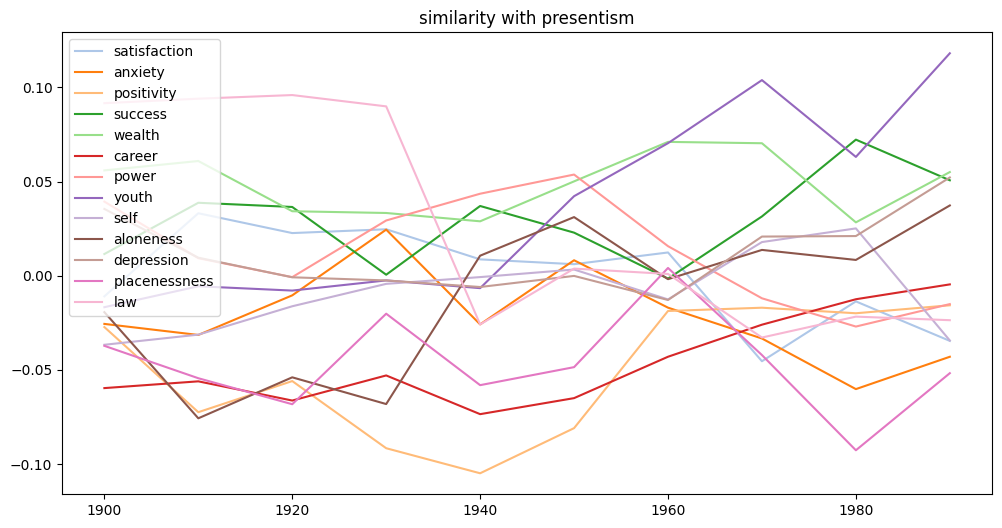

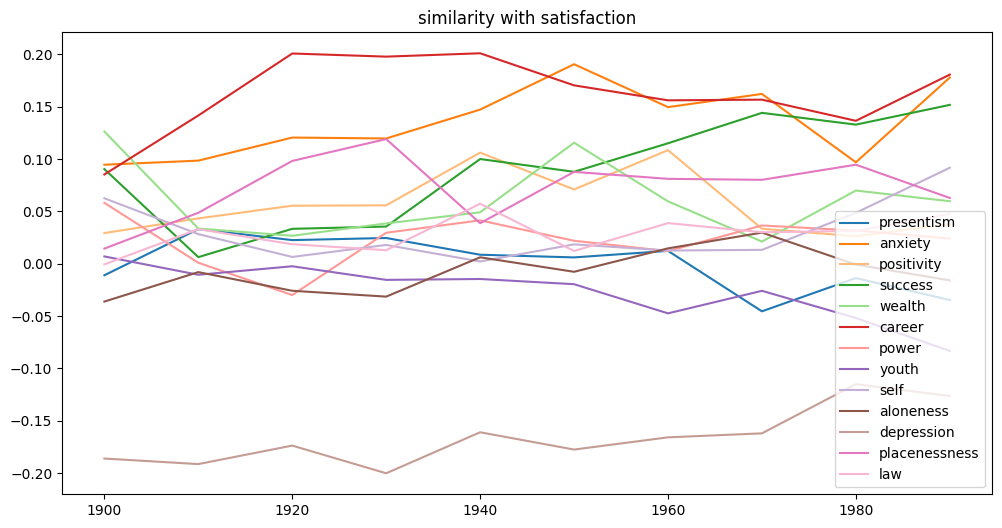

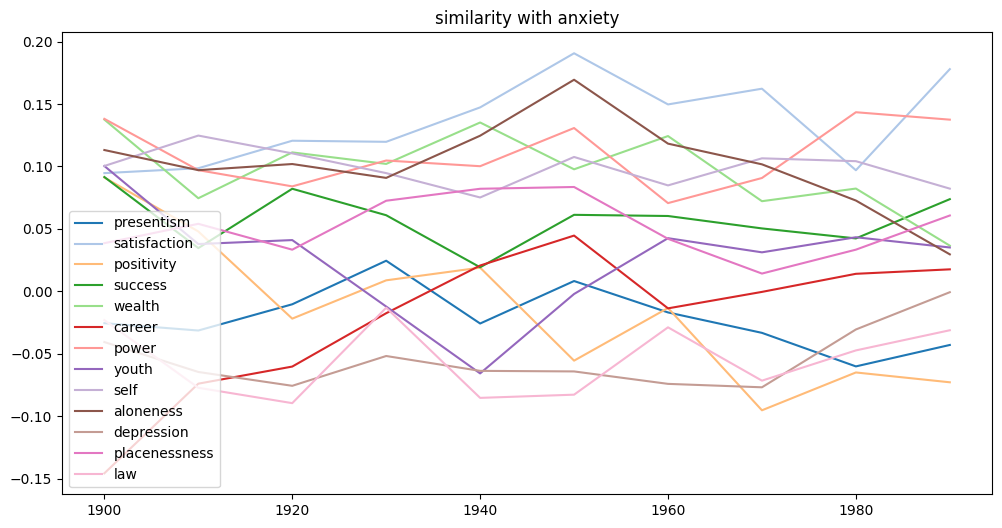

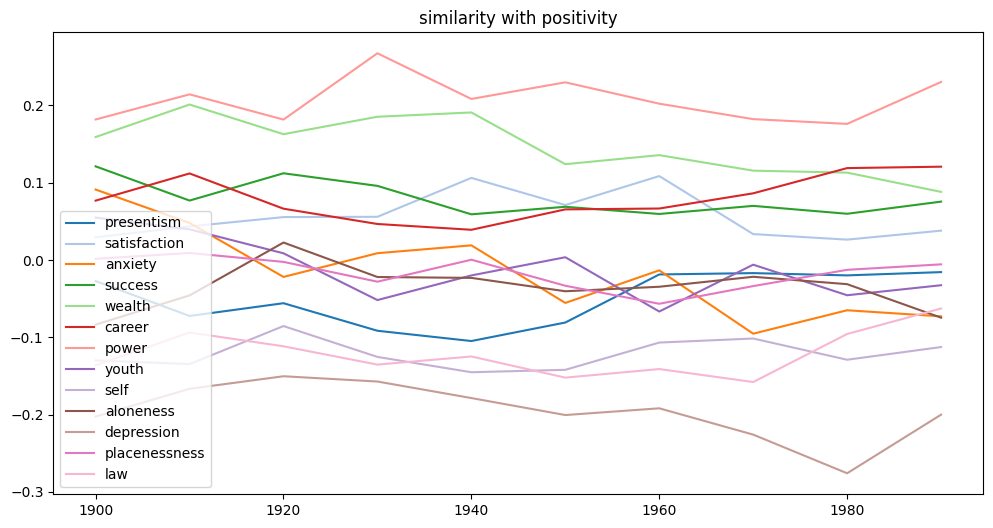

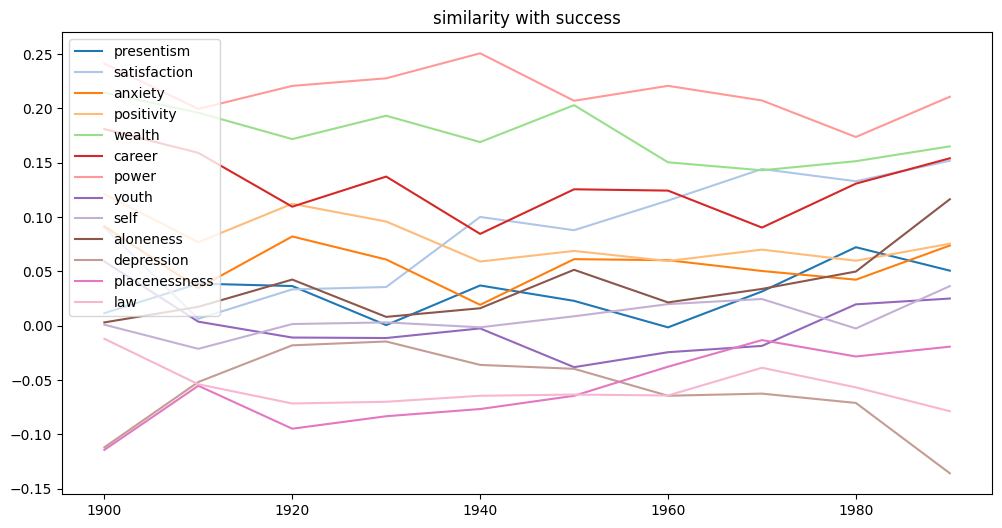

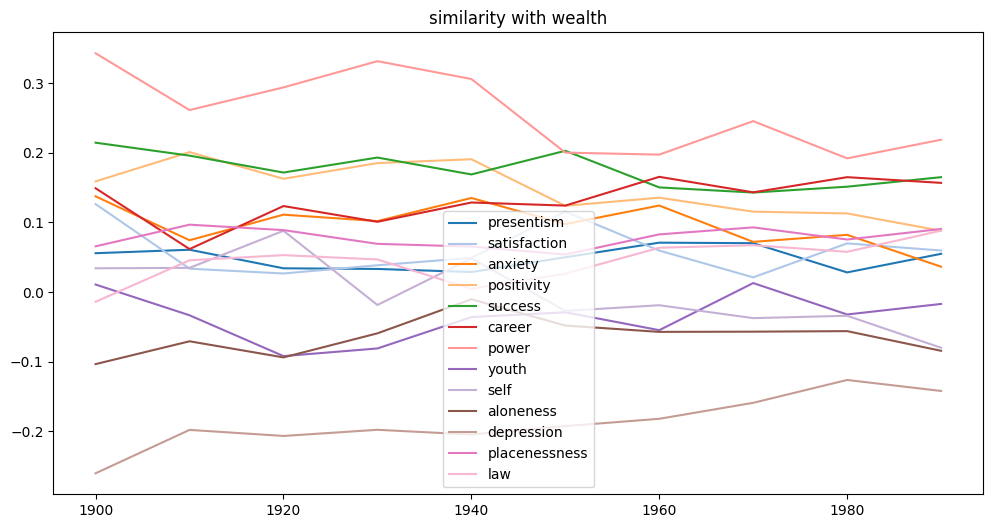

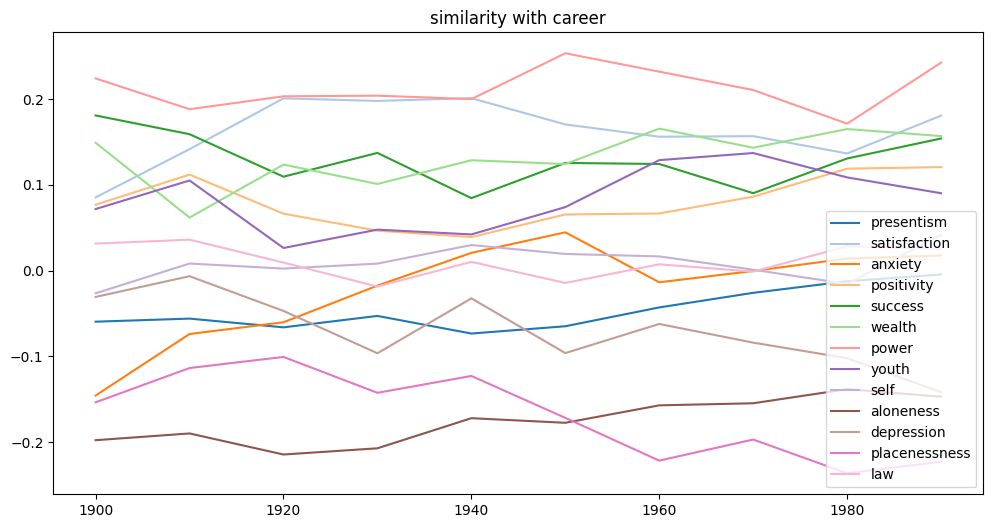

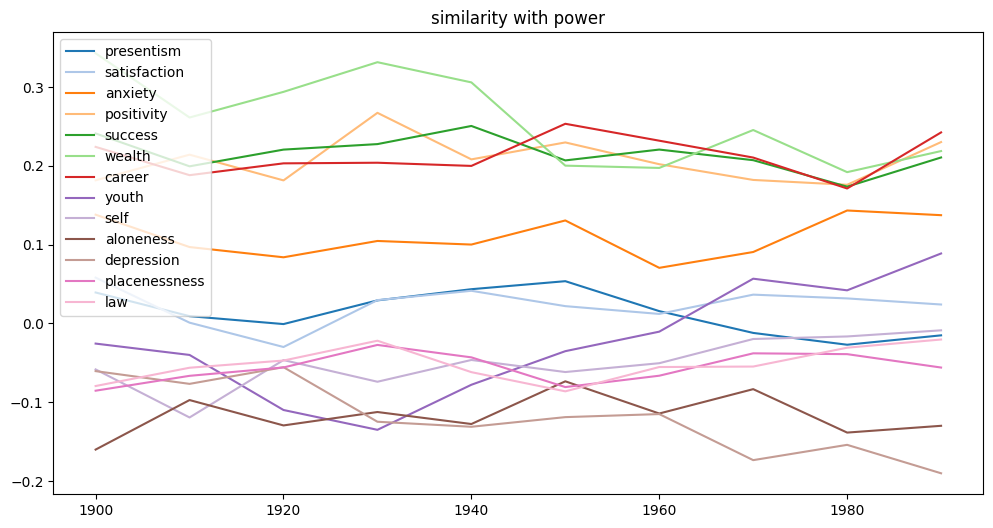

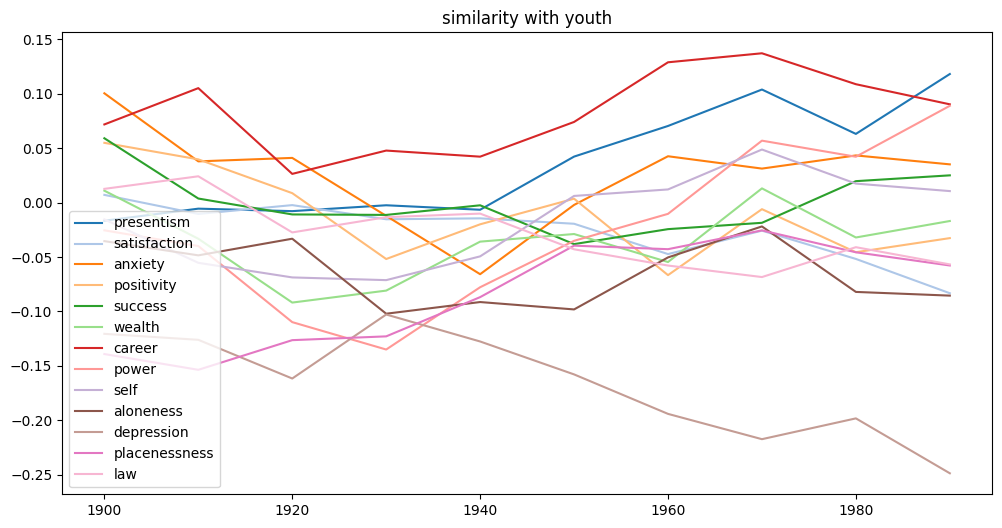

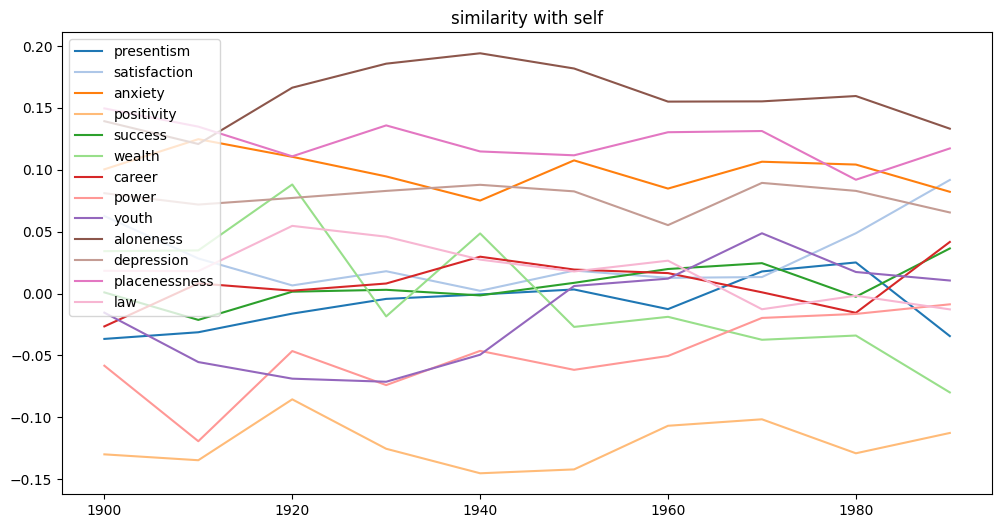

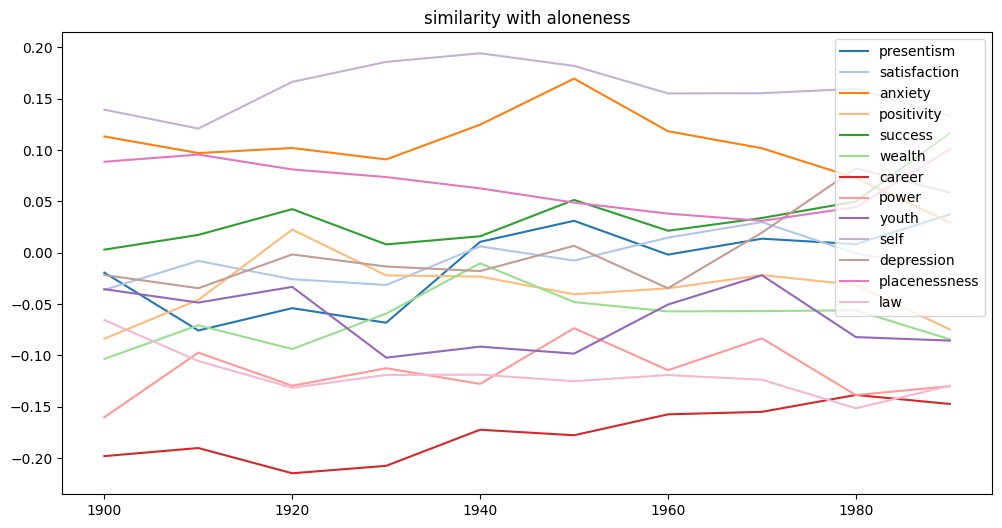

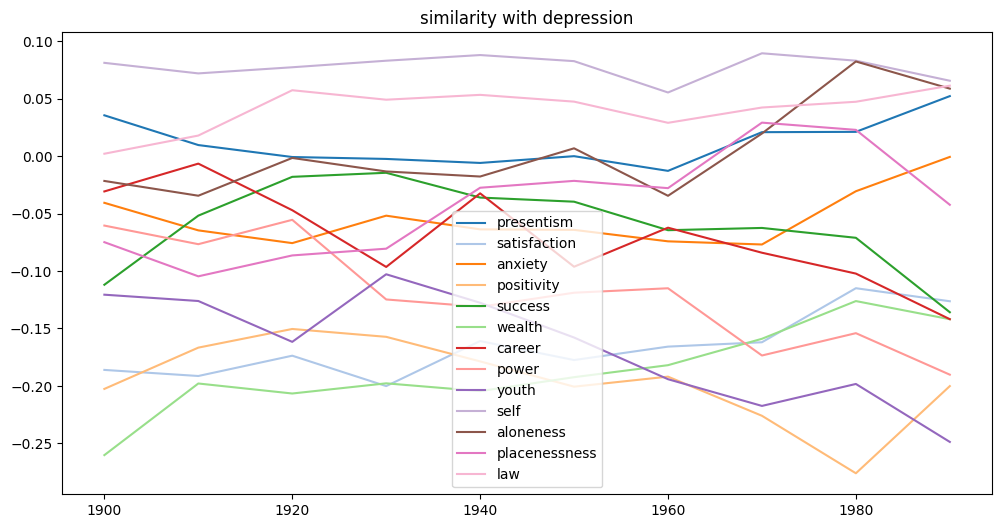

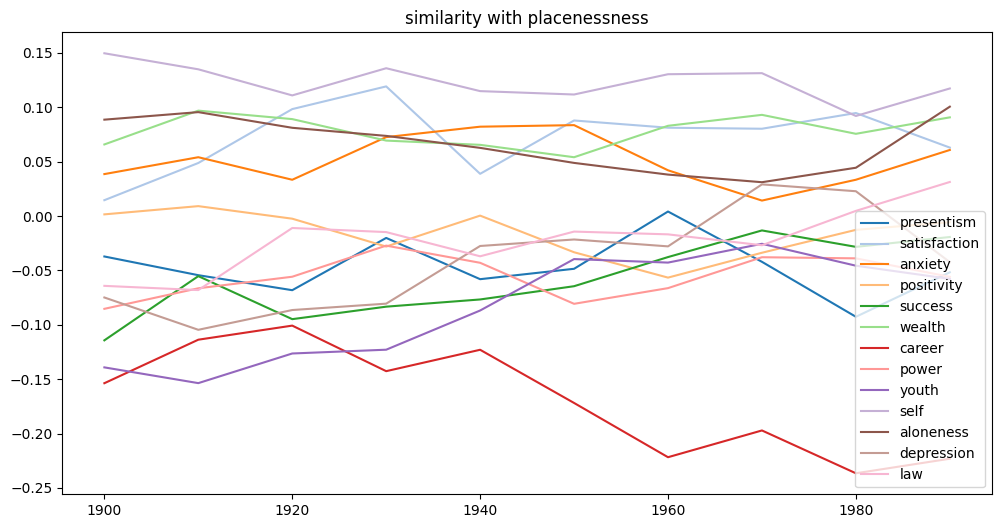

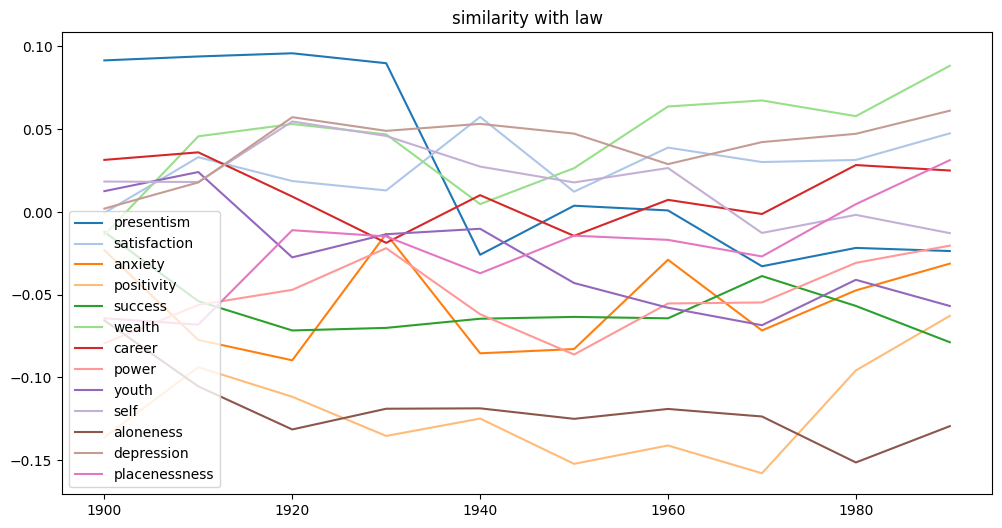

In [28]:
cmap=plt.get_cmap('tab20')
# for i,col in enumerate(df.columns):
#     plt.plot(df[col], color=cmap(i), label=c

for axis in axes:
    plt.figure(figsize=(12, 6))
    plt.title(f'similarity with {axis}')
    for axis_ in axes:
        if axis_ != axis:
            plt.plot(df.index, df[f'{axis}_{axis_}_similarity'], label=f'{axis_}', color=cmap(axes.index(axis_)))
            plt.legend()

I tried using Procrustean align to define linguistic change but the results do not appear correct so ignore for now

In [ ]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.syn0 / np.sqrt((model.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    # base_vecs = calc_syn0norm(in_base_embed)
    # other_vecs = calc_syn0norm(in_other_embed)
    base_vecs= [in_base_embed.get_vector(w,norm=True) for w in set(in_base_embed.index_to_key)]
    other_vecs= [in_other_embed.get_vector(w,norm=True) for w in set(in_other_embed.index_to_key)]

    # just a matrix dot product with numpy
    m = np.array(other_vecs).T.dot(np.array(base_vecs))
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v)
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.vectors =(np.array(other_vecs)).dot(ortho)
    return other_embed

def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.index_to_key)
    vocab_m2 = set(m2.index_to_key)

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.get_vecattr(w, "count")  + m2.get_vecattr(w, "count") ,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        new_arr = [m.get_vector(w,norm=True) for w in common_vocab]

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        # old_vocab = m.index_to_key
        new_vocab = []
        k2i={}
        for new_index,word in enumerate(common_vocab):
            new_vocab.append(word)
            k2i[word]=new_index
        m.index_to_key=new_vocab
        m.key_to_index=k2i
        m.vectors=np.array(new_arr)

    return (m1,m2)

In [ ]:
intersection_align_gensim(vecs_1900, vecs_1910)

(<gensim.models.keyedvectors.KeyedVectors at 0x7fd4bc63b8b0>,
 <gensim.models.keyedvectors.KeyedVectors at 0x7fd4c8989810>)

In [ ]:
vecs_list = []
for year in start_years:
    vecs_list.append(vars()[f'vecs_{year}'])

align_df = pd.DataFrame(vecs_list, index=start_years, columns=['vecs'])
align_df.index.name = 'year'
align_df

,vecs
year,
1900,"[[-0.15527616, -0.044475354, 0.24905019, 0.069..."
1910,"[[0.13818951, 0.08336567, 0.43356463, 0.008813..."
1920,"[[0.08622483, 0.059710536, 0.03332708, 0.30869..."
1930,"[[0.18046615, 0.025464488, 0.057560947, -0.195..."
1940,"[[-0.24909955, 0.15136285, 0.016276099, -0.289..."
1950,"[[0.04905158, 0.21111171, 0.059865676, -0.3999..."
1960,"[[-0.10262189, -0.20712672, -0.25004148, -0.36..."
1970,"[[0.038553976, -0.024851937, 0.058079448, -0.0..."
1980,"[[0.007697806, -0.29029608, -0.17834997, 0.002..."


In [ ]:
def compareModels(df, year, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    embeddings_raw = rawModels(df, year)
    years = sorted(set(df.index))
    #These are much quicker
    embeddings_aligned = {}
    for year0 in years:
        embeddings_aligned[year0] = [embeddings_raw[year0]]
        for year1 in years:
            embeddings_aligned[year0].append(smart_procrustes_align_gensim(embeddings_aligned[year0][-1], embeddings_raw[year1]))
    return embeddings_raw, embeddings_aligned

In [ ]:
def rawModels(df, year):
    embeddings_raw = {}
    years = sorted(set(df.index))
    for year in years:
        print("Embedding {}".format(year), end = '\r')
        # embeddings_raw[year] = KeyedVectors.load(f'/Volumes/Dan2/models/ngrams_{year}_{year+9}_{VOCAB_LEN}.kv')
        embeddings_raw[year] = KeyedVectors.load(f'/content/drive/MyDrive/models/ngrams_{year}_{year+9}_{VOCAB_LEN}.kv')
    return embeddings_raw

In [ ]:
sorted(set(align_df.index))

[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]

In [ ]:
import copy

In [ ]:
rawEmbeddings, comparedEmbeddings = compareModels(align_df, 1900)

In [ ]:
rawEmbeddings.keys()

dict_keys([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990])

In [ ]:
comparedEmbeddings[1900][1:]

In [ ]:
import seaborn

In [ ]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    years = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for year in years:
        dists[year] = []
        for embed in embeddingsDict[year][1:]:
            dists[year].append(np.abs(1 - cos_sim(embeddingsDict[year][0].get_vector(word), embed.get_vector(word))))
            # dists[year].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[year][0].get_vector(word), axis = 0),
                                                                            #  np.expand_dims(embed.get_vector(word), axis = 0))[0,0]))
    return pd.DataFrame(dists, index = years)

In [ ]:
cos_sim(vecs_1900.get_vector('alone'), vecs_1990.get_vector('alone'))

0.022365741

alone


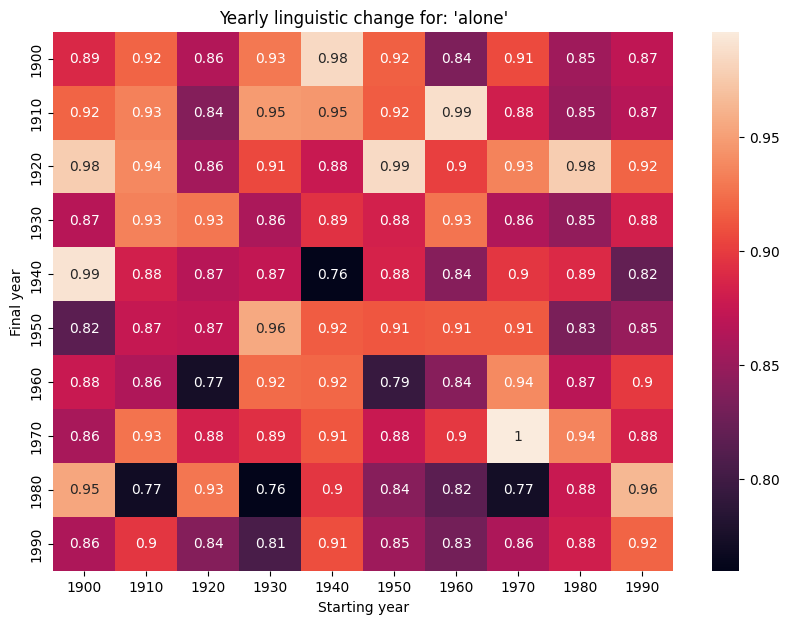

In [ ]:
targetWord = 'alone'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = True) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

1777


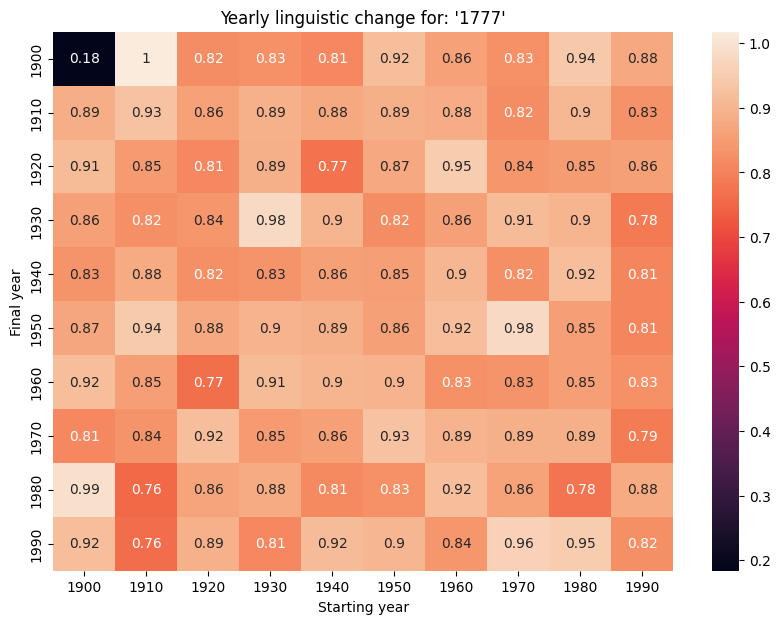

In [ ]:
targetWord = '1777'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = True) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))

    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        try:
            dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0].get_vector(word), axis = 0), np.expand_dims(embed.get_vector(word), axis = 0))[0,0])
        except:
            pass
    return np.mean(dists)

def findMostDivergent(embeddingsDict):
    original_words = comparedEmbeddings[1950][0].index_to_key
    for embeds in embeddingsDict.values():
        for embed in embeds:
            original_words = set(original_words).intersection(set(embed.index_to_key))
    words = set(original_words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)


In [ ]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 38776 words to compare


In [ ]:
wordDivergences[:20]

[('enrolling', 0.9806333439424634),
 ('throughout', 0.9747950276359916),
 ('supposedly', 0.971566175413318),
 ('designate', 0.9680283304303885),
 ('fails', 0.9680269803851843),
 ('importation', 0.9679269158747047),
 ('original', 0.9660361577291041),
 ('booked', 0.9646084829233587),
 ('cede', 0.9635885948315263),
 ('paradoxically', 0.9635194814763963),
 ('reaffirm', 0.9625085209961981),
 ('whereas', 0.9624666890653316),
 ('rattled', 0.9622473020106554),
 ('frontier', 0.9620624675881118),
 ('meets', 0.9614832983352244),
 ('bode', 0.9603582941694185),
 ('contradistinction', 0.9596705974079669),
 ('motto', 0.958597457408905),
 ('outweighed', 0.9585540888831019),
 ('kindergarten', 0.9579813658376224)]

In [ ]:
wordDivergences[-20:]

[('1777', 0.8183261865284294),
 ('acromion', 0.8180205732583999),
 ('buccal', 0.8178797572851181),
 ('kiowas', 0.8173157446086406),
 ('diaphysis', 0.817247723788023),
 ('695', 0.8154496684670448),
 ('2.20', 0.8145008489489556),
 ('enteric', 0.8139132861047983),
 ('characters', 0.8136421203613281),
 ('303', 0.8135642997920514),
 ('241', 0.8123655840754509),
 ('492', 0.810645742714405),
 ('announcements', 0.8098965920507908),
 ('staphylococcus', 0.8098622336983681),
 ('457', 0.8077458381652832),
 ('4.27', 0.8043119229376317),
 ('glomerulus', 0.8026365861296654),
 ('491', 0.8003276444971561),
 ('228', 0.7970010817050934),
 ('375', 0.796623469889164)]

Conduct a TSNE analysis

In [ ]:
vecs_list = []
for year in start_years:
    vecs_list.append(vars()[f'vecs_{year}'])

tsne_df = pd.DataFrame(vecs_list, index=start_years, columns=['vecs'])
for word in words:
    tsne_df[word] = tsne_df['vecs'].apply(lambda x: x[word])
tsne_df

,vecs,purposeless,insignificance,insignificant,meaningless,purpose,significance,significant,meaning,unemployed,...,united,alone,lonely,isolated,poor,impoverished,destitute,wealthy,rich,affluent
1900,"[[-0.15527616, -0.044475354, 0.24905019, 0.069...","[0.48251227, -0.08346512, -0.9432621, 0.016102...","[-0.7485681, 0.45528322, 0.08649515, -0.376824...","[-0.7589314, -0.066041, 0.050258387, -0.184716...","[-0.8357023, 0.1076255, -0.1995702, -0.2590385...","[0.38783336, -0.15418133, 0.019795492, 0.23367...","[-0.28992066, 0.19424394, -0.5360962, 0.371010...","[-0.62643087, -0.078026205, -0.6784462, 0.4745...","[-0.24596845, 0.23121788, -0.26103917, 0.01546...","[-0.09406189, 0.40237316, 0.055457335, 0.16744...",...,"[0.136296, 0.14966337, -0.19310193, -0.1828339...","[-0.116260715, -0.19346146, 0.35306767, -0.002...","[-0.18227816, 0.040866327, 0.18088822, 0.36074...","[-0.77745336, -0.2777936, 0.16526027, 0.025358...","[-0.029870844, -0.031296276, 0.27337462, 0.241...","[-0.44652984, 0.27812588, 0.39538965, -0.25353...","[-0.5299738, 0.5845253, 0.1589474, 0.20242523,...","[-0.4961655, 0.46519646, 0.35939154, -0.136325...","[0.26297042, 0.12286456, -0.27508864, -0.00171...","[-0.5796103, -0.21825887, -0.058000825, -0.153..."
1910,"[[0.13818951, 0.08336567, 0.43356463, 0.008813...","[-0.23873028, 0.23344758, -0.09987129, 0.15330...","[0.38062182, -0.27621454, 0.48894408, 0.040799...","[0.004818795, 0.07733415, 0.21600567, 0.151206...","[-0.015357096, -0.0029446976, 0.30200782, 0.09...","[-0.08985611, 0.16102056, 0.4392619, 0.3065959...","[-0.36772338, 0.08070288, 0.76675785, 0.024821...","[0.21313958, -0.0095660025, 0.110127255, 0.433...","[0.011046163, 0.2276128, 0.47088295, -0.209615...","[-0.44277263, 0.53326344, 0.71857667, -0.27784...",...,"[0.4965424, -0.24391712, 0.43094397, 0.0130617...","[0.14337619, 0.23760404, 0.6880111, -0.0848566...","[0.27324528, 0.039592635, 0.5137857, 0.3322455...","[-0.3526263, 0.0041236943, 0.28870204, -0.0799...","[-0.08066107, 0.21210726, -0.023981899, -0.404...","[-0.06331654, 0.6069261, -0.23342134, -0.40997...","[-0.5435773, -0.49396032, 0.4139366, -0.046415...","[0.13800095, 0.22709475, -0.38235566, 0.210367...","[-0.26486486, 0.43279713, 0.28291994, 0.107967...","[0.28679317, 0.02480542, -0.34966978, 0.206630..."
1920,"[[0.08622483, 0.059710536, 0.03332708, 0.30869...","[0.34864172, 0.11129553, 0.199387, -0.33698958...","[0.52674866, -0.4250579, 0.0688977, 0.34493795...","[0.11308868, -0.030140096, 0.49909878, -0.4171...","[-0.40959504, 0.28933948, -0.034285065, -0.232...","[-0.09268002, 0.1847047, 0.5005384, -0.4085625...","[-0.1900011, -0.05687356, 0.2499151, 0.2014639...","[-0.69285184, -0.23460151, 0.54178494, -0.4587...","[-0.6838236, 0.11705707, -0.08133358, 0.012528...","[0.1870031, 0.384408, 0.43192953, -0.14078677,...",...,"[-0.16897644, 0.066583715, 0.5897408, -0.19490...","[-0.059130758, 0.0016028145, 0.38633585, -0.03...","[0.29403406, 0.7333262, 0.23690277, -0.3853022...","[0.35202006, 0.3331318, 0.47358248, -0.2636433...","[0.28609207, 0.07359377, 0.119830966, -0.11257...","[-0.13914889, 0.10449206, 0.3610194, 0.3346683...","[0.34394675, -0.05738333, 0.32393977, 0.097220...","[0.089319944, 0.14467841, 0.22629407, 0.081439...","[0.08173278, 0.09358665, 0.07946975, 0.1493541...","[0.19827753, 0.24585085, 0.692057, -0.13535306..."
1930,"[[0.18046615, 0.025464488, 0.057560947, -0.195...","[-0.12174686, -0.20461647, 0.22465207, -0.4305...","[-0.16637832, -0.49314734, 1.2117254, 0.201956...","[0.085550055, -0.21527898, 0.761706, 0.3343198...","[0.18315037, -0.6326365, 0.5690389, 0.10460888...","[-0.20847674, -0.3987028, -0.2749197, -0.14062...","[-0.19376503, -0.4769631, 0.6042013, 0.0889001...","[-0.48052356, -0.26129737, 0.39175224, -0.0515...","[-0.06762934, -0.1643744, 0.068780005, 0.06343...","[0.095317684, -0.058772836, -0.01010682, 0.181...",...,"[-0.61804813, 0.04690505, 0.029689671, 0.26855...","[-0.035182424, -0.076474465, 0.18593036, 0.087...","[-0.096125096, -0.0153305

Plot the results

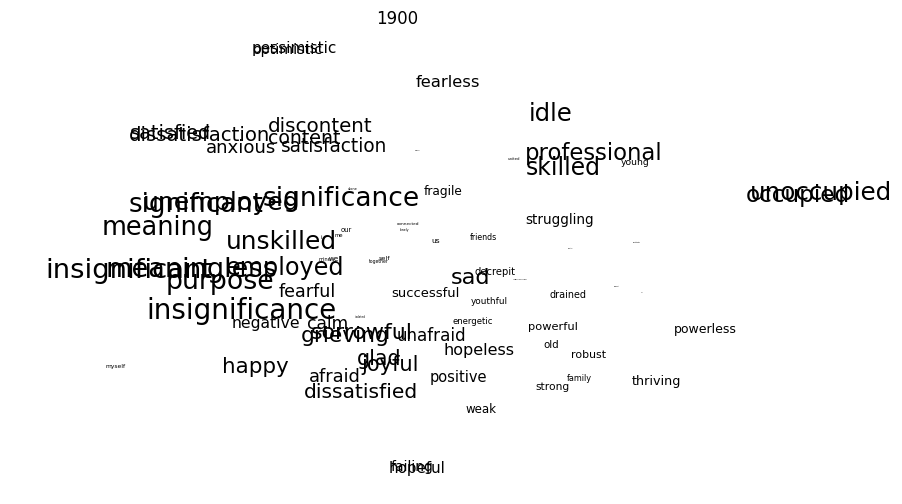

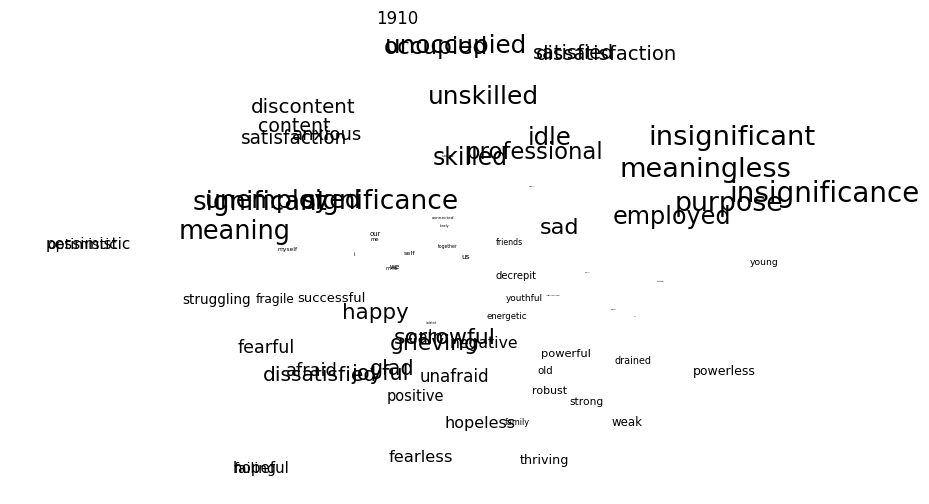

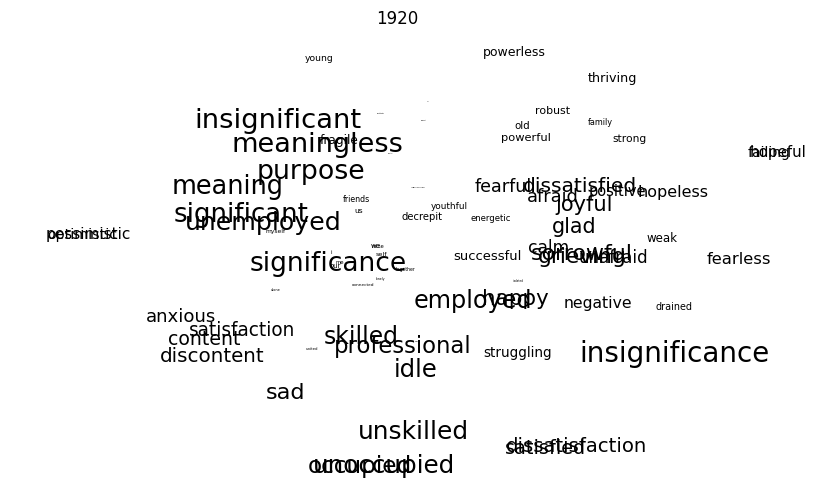

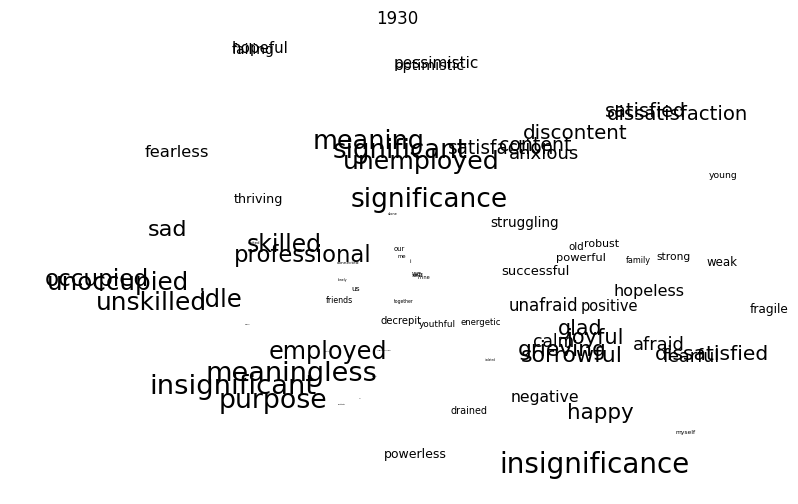

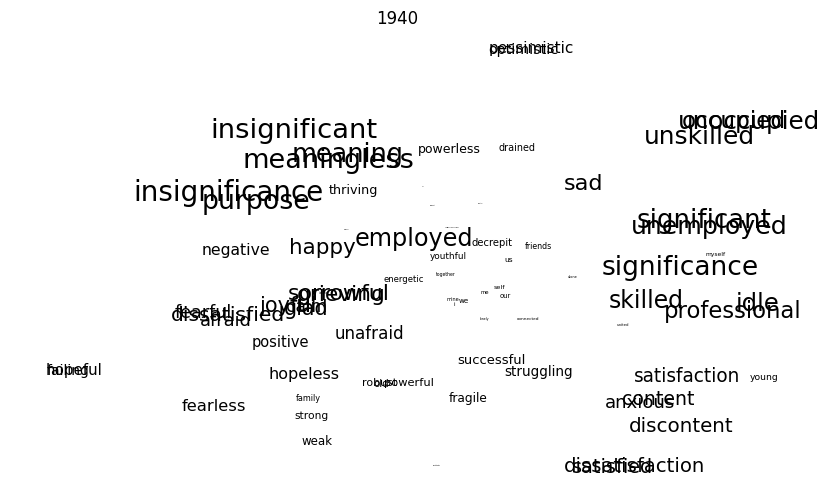

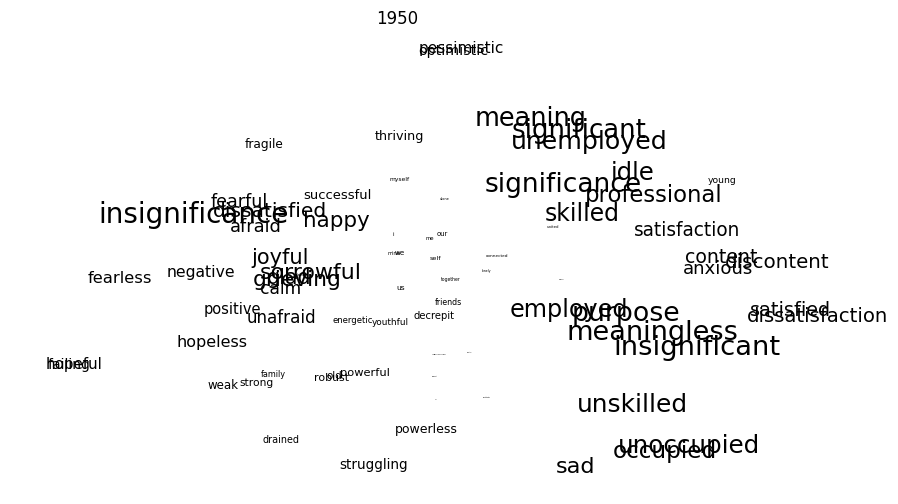

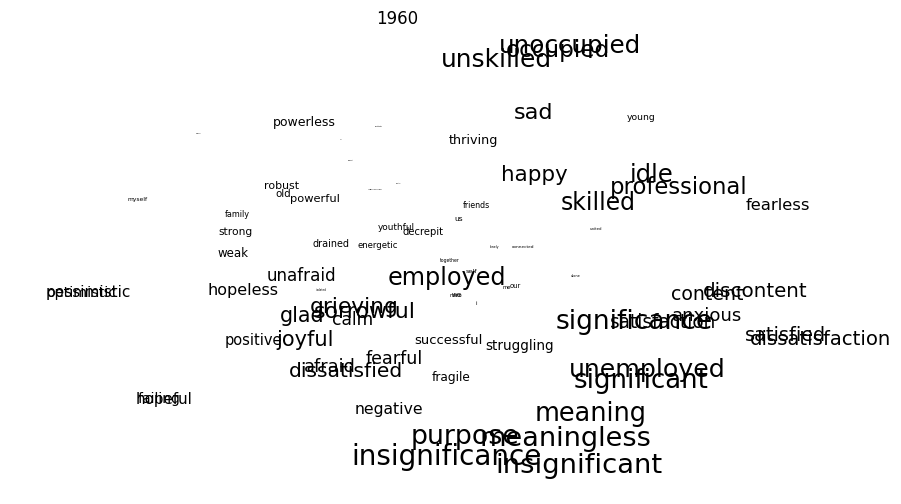

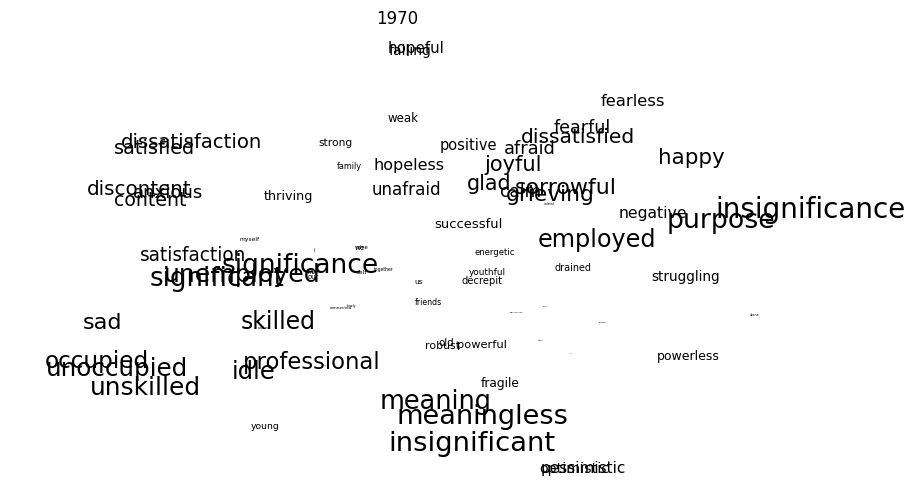

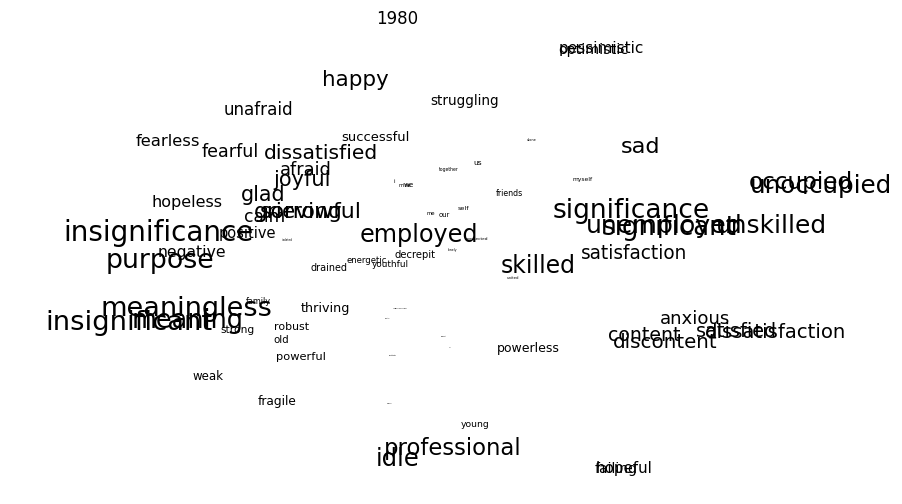

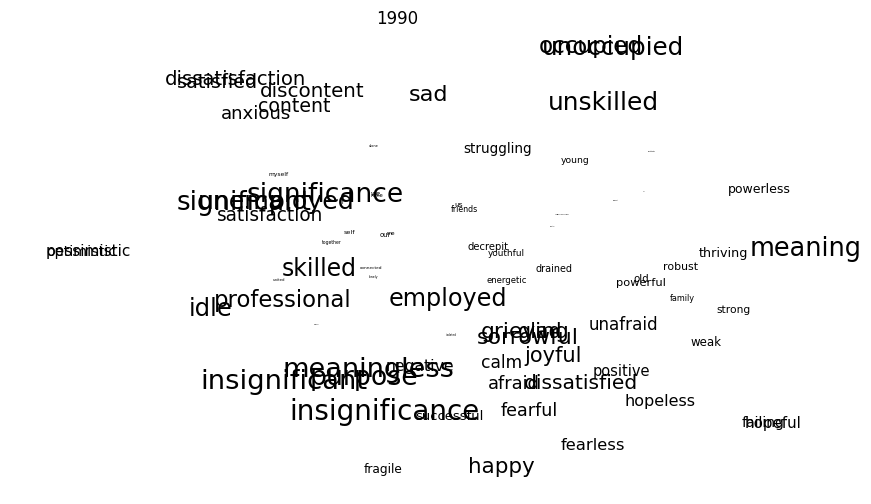

In [ ]:
for year in tsne_df.index:
    wordsSubMatrix = []
    for word in words:
        wordsSubMatrix.append(tsne_df.loc[year, 'vecs'][word])
    wordsSubMatrix = np.array(wordsSubMatrix)
    pcaWords = sklearn.decomposition.PCA(n_components = len(words)).fit(wordsSubMatrix)
    reducedPCA_data = pcaWords.transform(wordsSubMatrix)
    tsneWords = sklearn.manifold.TSNE(n_components = 2, perplexity = 30).fit_transform(reducedPCA_data)
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(111)
    ax.set_frame_on(False)
    numWords = len(tsne_df.iloc[:, 1:].columns)
    plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible
    for i, word in enumerate(tsne_df.iloc[:, 2:].columns):
        ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
    plt.xticks(())
    plt.yticks(())
    plt.title(year)
    plt.show()